<a href="https://colab.research.google.com/github/LZHbaba/lzh_garbage_classification/blob/main/InceptionResNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
219070464/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_203 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
142/142 [==============================] - 646s 4s/step - loss: 0.8843 - accuracy: 0.6946 - val_loss: 0.7062 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 2/20
142/142 [==============================] - 36s 256ms/step - loss: 0.6457 - accuracy: 0.7654 - val_loss: 0.5722 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 3/20
142/142 [==============================] - 36s 256ms/step - loss: 0.5743 - accuracy: 0.7909 - val_loss: 0.4784 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 4/20
142/142 [==============================] - 36s 256ms/step - loss: 0.5251 - accuracy: 0.8089 - val_loss: 0.4438 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 5/20
142/142 [==============================] - 37s 258ms/step - loss: 0.5068 - accuracy: 0.8238 - val_loss: 0.4403 - val_accuracy: 0.8406 - lr: 0.0010
Epoch 6/20
142/142 [==============================] - 36s 256ms/step - loss: 0.4796 - accuracy: 0.8247 - val_loss: 0.4665 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 7/20
142/142 [==============================] - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
142/142 [==============================] - 37s 256ms/step - loss: 0.2401 - accuracy: 0.9161 - val_loss: 0.3169 - val_accuracy: 0.8964 - lr: 1.0000e-05
Epoch 2/20
142/142 [==============================] - 37s 258ms/step - loss: 0.2466 - accuracy: 0.9121 - val_loss: 0.3154 - val_accuracy: 0.9004 - lr: 1.0000e-05
Epoch 3/20
142/142 [==============================] - 37s 257ms/step - loss: 0.2484 - accuracy: 0.9055 - val_loss: 0.3160 - val_accuracy: 0.9004 - lr: 1.0000e-05
Epoch 4/20
142/142 [==============================] - 37s 258ms/step - loss: 0.2423 - accuracy: 0.9170 - val_loss: 0.3159 - val_accuracy: 0.9044 - lr: 1.0000e-05
Epoch 5/20
142/142 [==============================] - 37s 257ms/step - loss: 0.2389 - accuracy: 0.9156 - val_loss: 0.3171 - val_accuracy: 0.9004 - lr: 1.0000e-05
Epoch 6/20
143/142 [==============================] - ETA: 0s - loss: 0.2429 - accuracy: 0.9130
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
142/142 [========

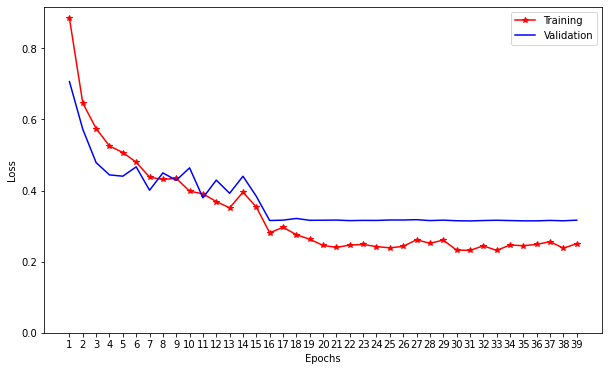

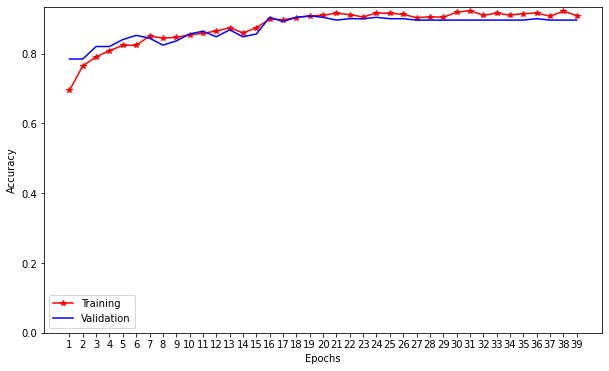

In [ ]:
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

#import keras api needed to implement deep learning techiques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#import libraries for visualization of data
import matplotlib.pyplot as plt

np.random.seed(2022)
tf.random.set_seed(2022)
SEED = 2022
#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline
#paths to the train, validation and test image datasets 
train_path = '/content/drive/MyDrive/datasets_garbage/Garbage classification'
valid_path = '/content/drive/MyDrive/datasets_garbage/Garbage classification'

IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=  tf.keras.applications.inception_resnet_v2.preprocess_input  ,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(IMG_SIZE,IMG_SIZE), classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], batch_size=16, subset='training',seed=SEED)


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=  tf.keras.applications.inception_resnet_v2.preprocess_input  ,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(IMG_SIZE,IMG_SIZE), classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], batch_size=16, subset='validation',seed=SEED)


# import the convolution base of the VGG16 model with pre-trained weights
#base_model = tf.keras.applications.resnet.ResNet152(input_shape=IMG_SHAPE, 
                                       # include_top=False,
                                      #  weights='imagenet')
#base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top=False, weights='imagenet', input_shape=IMG_SHAPE)
#model = Sequential()
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(
    input_shape=IMG_SHAPE, include_top=False,
    weights='imagenet', pooling=None,
    )
model = Sequential()
# Freeze the convolutional base of VGG16 to prevent the pre-trained weights being updated 
# during training inorder to extract features
base_model.trainable=False

# add VGG16 convolution base to initialize sequential model
model.add(base_model)

# add global average pooling layer
model.add(GlobalAveragePooling2D())

# add densely-connected NN layer with 512 hidden units
model.add(Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(BatchNormalization())                 # normalize and scale inputs or activations
model.add(Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu')) # use ReLU activation function
model.add(BatchNormalization())                # normalize and scale inputs or activations
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'inceptionResnetV2_%s_model.{epoch:03d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
from keras.callbacks import ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

#lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=0.1,
                               monitor='val_loss',
                               cooldown=0,
                               patience=4,
                               min_lr=0,
                               verbose=1,
                               mode='auto',
                               
                              )
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=8)
callbacks = [lr_reducer,es]

history = model.fit_generator(
   train_batches,
    steps_per_epoch=train_batches.samples/train_batches.batch_size ,
    epochs=20,
    validation_data=valid_batches,
    validation_steps=valid_batches.samples/valid_batches.batch_size,
    verbose=1,
    callbacks = callbacks)
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
validation_accuracy =history.history['val_accuracy']

# base_model.trainable=True
from tensorflow.keras import layers
for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
history = model.fit_generator(
   train_batches,
    steps_per_epoch=train_batches.samples/train_batches.batch_size ,
    epochs=20,
    validation_data=valid_batches,
    validation_steps=valid_batches.samples/valid_batches.batch_size,
    verbose=1,
    callbacks = callbacks)
loss.extend(history.history['loss'])
validation_loss.extend(history.history['val_loss'])
accuracy.extend(history.history['accuracy'])
validation_accuracy.extend(history.history['val_accuracy'])



epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,'r*-',label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0,max(plt.ylim())])
plt.xticks(epochs)
plt.legend()

epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs1,accuracy,'r*-',label="Training")
plt.plot(epochs1,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,max(plt.ylim())])
plt.xticks(epochs1)
plt.legend()
def save_txt(file_name='',object=[]):
    file = open(file_name, 'w')
    file.write(str(object))
    file.close()
    
save_txt('/content/drive/MyDrive/InceptionResNetV2_20_last20_4_8/loss.txt',loss)
save_txt('/content/drive/MyDrive/InceptionResNetV2_20_last20_4_8/val_loss.txt',validation_loss)
save_txt('/content/drive/MyDrive/InceptionResNetV2_20_last20_4_8/acc.txt',accuracy)
save_txt('/content/drive/MyDrive/InceptionResNetV2_20_last20_4_8/val_acc.txt',validation_accuracy)
save_path='/content/drive/MyDrive/InceptionResNetV2_20_last20_4_8/densnet201_parameter1_20.h5'

model.save_weights(save_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')